In [1]:
cd ../../..

/home/users/cdonoso/astromer


/home/users/cdonoso/miniconda3/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

import glob
import os

from tensorflow.keras.losses import CategoricalCrossentropy
from presentation.pipelines.steps.model_design import load_pt_model, build_classifier 
from presentation.pipelines.steps.load_data import build_loader 

pd.options.mode.chained_assignment = None  # default='warn'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%load_ext autoreload
%autoreload 2

2025-01-28 08:16:29.905173: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-28 08:16:29.905240: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-28 08:16:29.905281: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-28 08:16:29.915849: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
root = './presentation/results/diagstromer/2024-12-02_14-13-12/'

In [4]:
n_classes = {'alcock': 6, 'atlas': 5}

In [5]:
results = {'alcock': {}, 'atlas':{}}
for ds_name in ['alcock', 'atlas']:
    for spc in [20, 100, 500]:
        fold_gammas = []
        for fold_n in range(3):
        
            ft_case = '{}/fold_{}/{}_{}'.format(ds_name, fold_n, ds_name, spc)
            curr = os.path.join(root, 'classification', ft_case, 'skip_avg_mlp')

            astromer, model_config = load_pt_model(os.path.join(root, 'finetuning', ft_case))

            model = build_classifier(astromer, 
                                    model_config, 
                                    False, 
                                    n_classes[ds_name],
                                    arch='skip_avg_mlp')

            model.load_weights(os.path.join(curr, 'weights'))
            gamma_values = model.get_layer('gamma_weight').gamma.numpy()
            fold_gammas.append(gamma_values)

        results[ds_name][spc] =  fold_gammas
        
    

[INFO] Loading BASE
[INFO] Temperature: 0.00
[INFO] Mask format: K
[INFO] Adding trainable MSK token


2025-01-28 08:16:32.042057: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-01-28 08:16:32.042103: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: pececillo
2025-01-28 08:16:32.042111: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: pececillo
2025-01-28 08:16:32.042206: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.104.5
2025-01-28 08:16:32.042226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.104.5
2025-01-28 08:16:32.042232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.104.5


[INFO] Using skip_avg_mlp clf architecture with base
[INFO] Loading BASE
[INFO] Temperature: 0.00
[INFO] Mask format: K
[INFO] Adding trainable MSK token
[INFO] Using skip_avg_mlp clf architecture with base
[INFO] Loading BASE
[INFO] Temperature: 0.00
[INFO] Mask format: K
[INFO] Adding trainable MSK token
[INFO] Using skip_avg_mlp clf architecture with base
[INFO] Loading BASE
[INFO] Temperature: 0.00
[INFO] Mask format: K
[INFO] Adding trainable MSK token
[INFO] Using skip_avg_mlp clf architecture with base
[INFO] Loading BASE
[INFO] Temperature: 0.00
[INFO] Mask format: K
[INFO] Adding trainable MSK token
[INFO] Using skip_avg_mlp clf architecture with base
[INFO] Loading BASE
[INFO] Temperature: 0.00
[INFO] Mask format: K
[INFO] Adding trainable MSK token
[INFO] Using skip_avg_mlp clf architecture with base
[INFO] Loading BASE
[INFO] Temperature: 0.00
[INFO] Mask format: K
[INFO] Adding trainable MSK token
[INFO] Using skip_avg_mlp clf architecture with base
[INFO] Loading BASE
[IN

(7,) (7,) 7
(7,) (7,) 7
(7,) (7,) 7


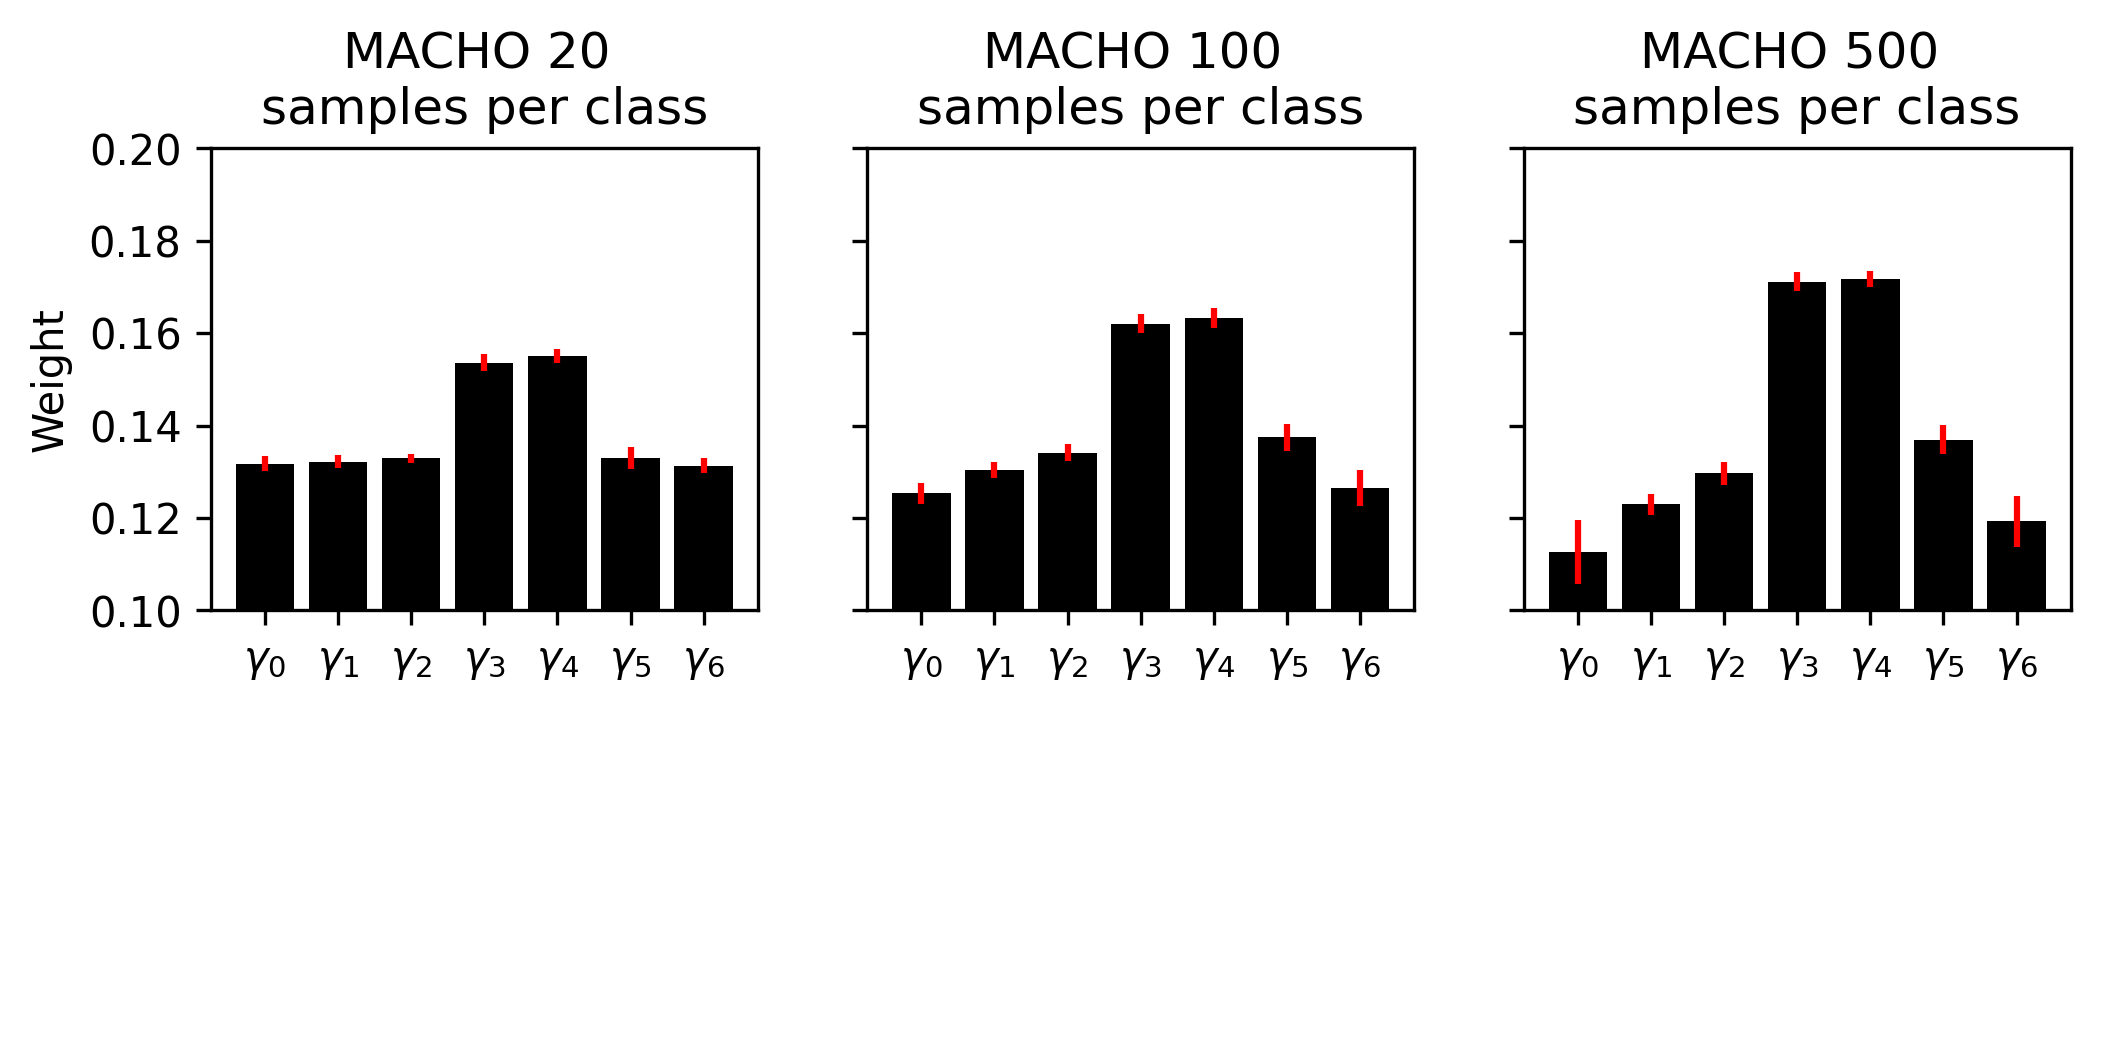

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(8, 2), dpi=300, sharey=True)
x = [r'$\gamma_0$', r'$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$', r'$\gamma_4$', r'$\gamma_5$', r'$\gamma_6$']

for i, spc in enumerate([20, 100, 500]):
    mean_values = np.mean(results['alcock'][spc], 0)
    std_values = np.std(results['alcock'][spc], 0)
    print(mean_values.shape, std_values.shape, len(x))
    axes[i].bar(range(len(x)),mean_values, yerr=std_values, color='k', error_kw=dict(ecolor='red'))
    axes[i].set_xticks(range(len(x)))
    axes[i].set_xticklabels(x)
    
    for k, v in enumerate(mean_values):
        axes[i].text(k-0.25, v-0.1, '{:.2f}'.format(v), fontsize=8, color='white')
        
    axes[i].set_title('MACHO {} \nsamples per class'.format(spc))
axes[0].set_ylabel('Weight')
axes[0].set_ylim(0.1, 0.2)
plt.show()

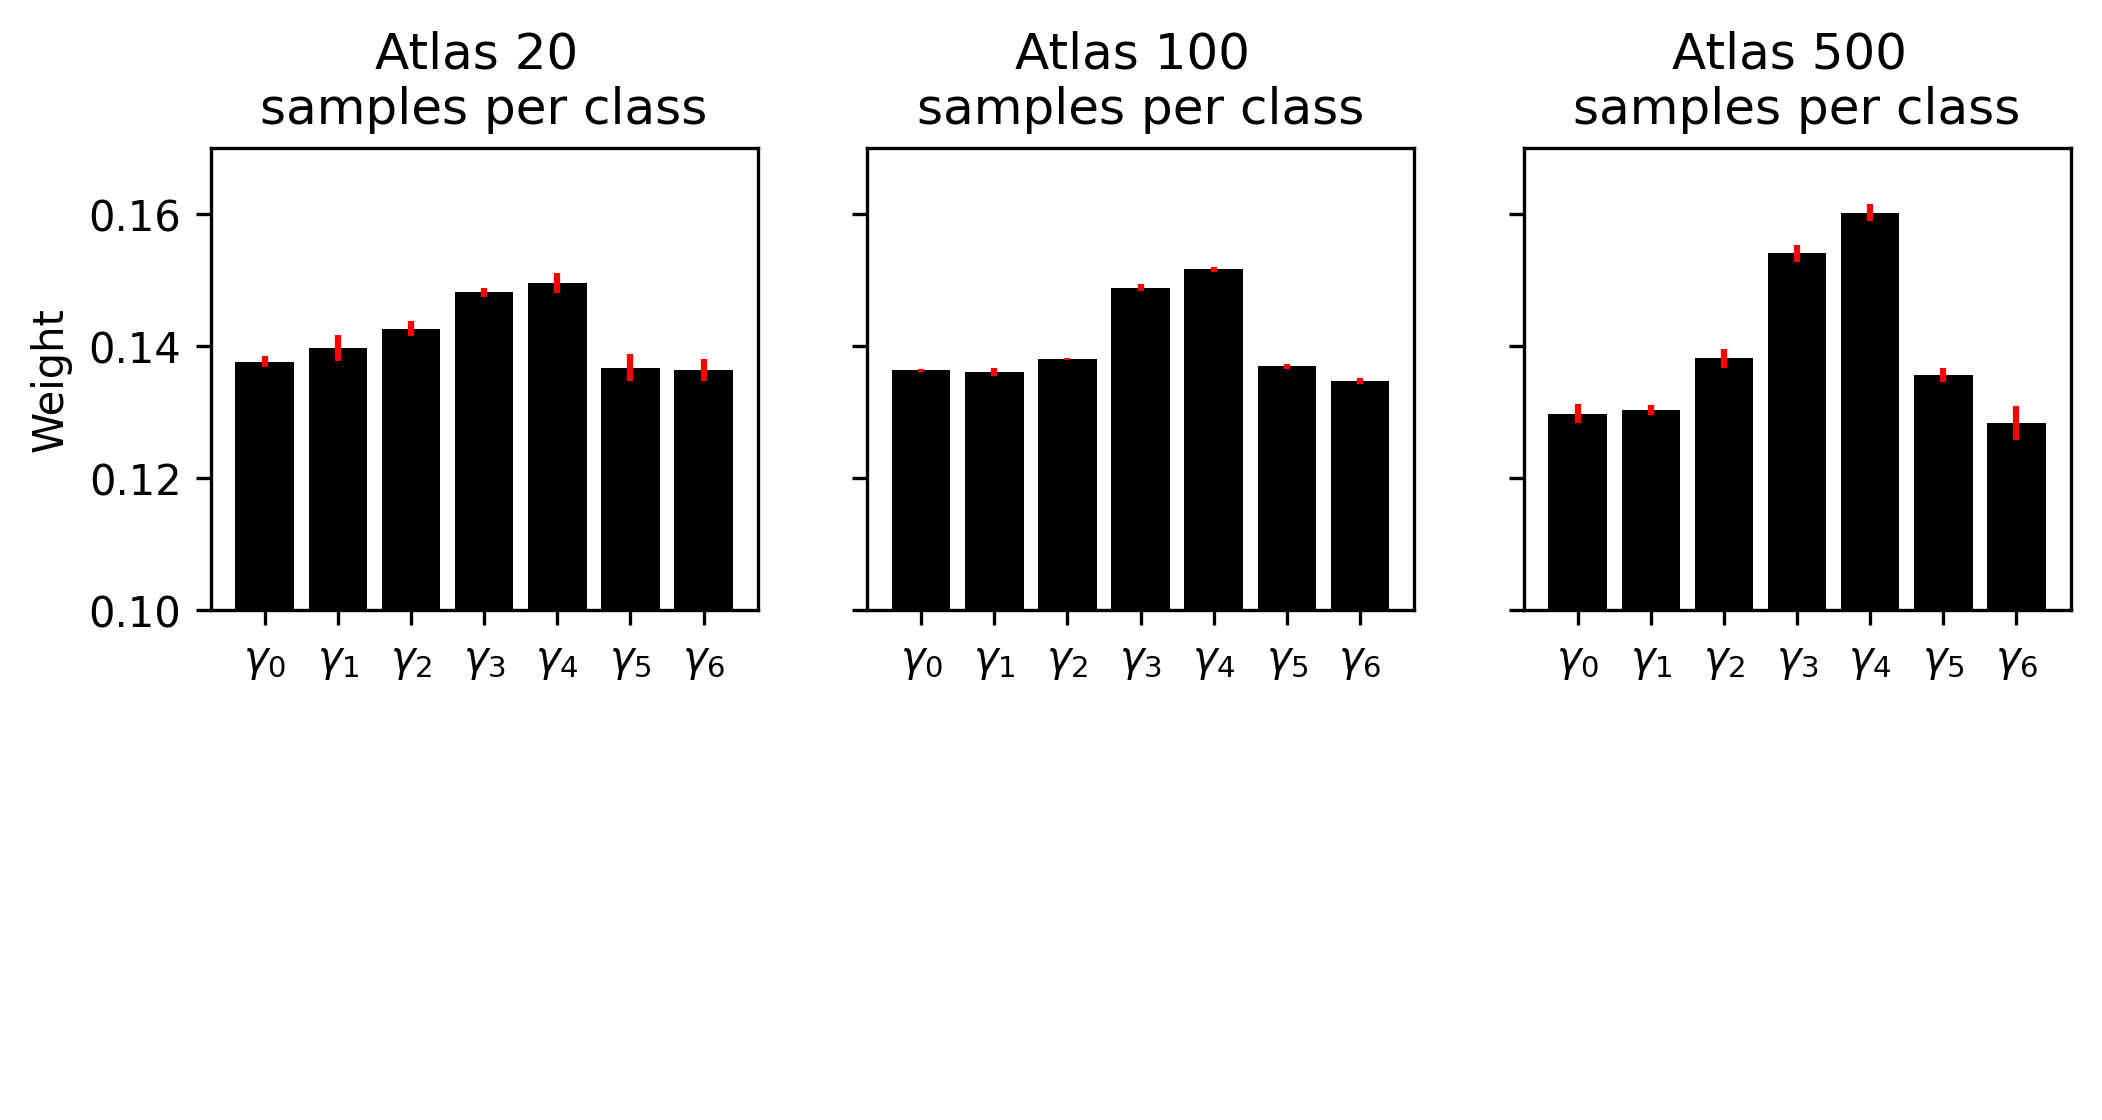

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(8, 2), dpi=300, sharey=True)
x = [r'$\gamma_0$', r'$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$', r'$\gamma_4$', r'$\gamma_5$', r'$\gamma_6$']

for i, spc in enumerate([20, 100, 500]):
    mean_values = np.mean(results['atlas'][spc], 0)
    std_values = np.std(results['atlas'][spc], 0)
    axes[i].bar(range(len(x)),mean_values, yerr=std_values, color='k', error_kw=dict(ecolor='red'))
    axes[i].set_xticks(range(len(x)))
    axes[i].set_xticklabels(x)
    
    for k, v in enumerate(mean_values):
        axes[i].text(k-0.25, v-0.1, '{:.2f}'.format(v), fontsize=8, color='white')
        
    axes[i].set_title('Atlas {} \nsamples per class'.format(spc))
axes[0].set_ylabel('Weight')
axes[0].set_ylim(0.1, 0.17)
plt.show()